In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import MDS, TSNE, SpectralEmbedding
from spectral_clustering import *
from sklearn.preprocessing import StandardScaler


In [81]:
def reduction_manifold(X, y, kpca_kernel, kpca_gamma, e_affinity, e_gamma, e_eigen, e_n_neighbors, t_perplexity):
  
  z_final = pd.DataFrame([])
  
  print("--------------------Finished PCA-----------------")
  pca = PCA(n_components=n_components, random_state=random_state)
  z_pca = pca.fit_transform(X)
  z_pca = pd.DataFrame({"x_pca":z_pca[:,0], "y_pca":z_pca[:,1]})
  
  print("-------------------Finished KPCA-----------------")
  kpca = KernelPCA(n_components=n_components, kernel=kpca_kernel, gamma=kpca_gamma, random_state=random_state, 
                   eigen_solver="auto")
  z_kpca = kpca.fit_transform(X)
  z_kpca = pd.DataFrame({"x_kpca":z_kpca[:,0], "y_kpca":z_kpca[:,1]})  
  
  print("-------------------Finished Spectral Embedding-----------------")
  embedding = SpectralEmbedding(n_components=n_components, affinity=e_affinity, gamma=e_gamma,
                              eigen_solver=e_eigen, n_neighbors=e_n_neighbors, random_state=random_state, n_jobs=-1) 
  z_embedding = embedding.fit_transform(X)
  z_embedding = pd.DataFrame({"x_embedding":z_embedding[:,0], "y_embedding":z_embedding[:,1]})  


  print("-------------------Finished T-SNE-----------------")
  tsne = TSNE(n_components=n_components, verbose=t_verbose, perplexity=t_perplexity, random_state=19970808,
               init="pca", n_jobs=-1)
  z_tsne = tsne.fit_transform(X)
  z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})  

  z_final = pd.concat([z_pca, z_kpca, z_embedding, z_tsne], axis=1)

  fig, axs = plt.subplots(ncols=4, figsize=(25,5))
  methods = ["PCA", "KPCA", "SE", "TSNE"]
  for i in [0, 1, 2, 3]:
      sns.scatterplot(ax=axs[i], x=z_final.iloc[:,i*2], y=z_final.iloc[:,i*2+1], legend=False, size=0.7, 
                  hue=y, palette="tab10")
      axs[i].set(title=methods[i])
  plt.show()

  return z_final

In [10]:
data_world = pd.read_csv("data/data_world.csv")
display(data_world.head(5))

x1        x2  color
0  0.293714  0.630976  brown
1  0.321981  0.661564  brown
2  0.338671  0.552370  brown
3  0.300610  0.634442  brown
4  0.348797  0.634638  brown

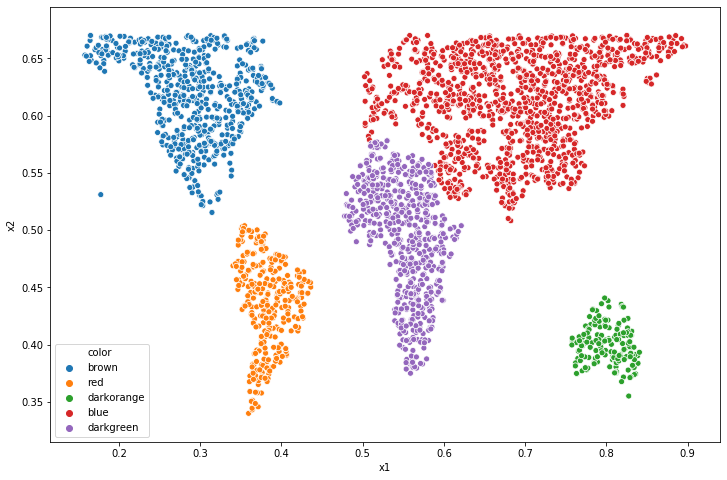

In [40]:
fig, axs = plt.subplots( figsize=(12,8))
sns.scatterplot(data=data_world, x="x1", y="x2", hue="color", palette="tab10")
plt.show()

In [18]:
data_world.groupby("color").count()

x1    x2
color                 
blue        1231  1231
brown        609   609
darkgreen    588   588
darkorange   162   162
red          316   316

In [12]:
# !pip install plotly-express

In [13]:
import plotly.express as px


# Embeding

In [14]:
# transformamos los datos
y = np.array(data_world["color"])

p = np.array(data_world["x1"])*(2*np.pi-0.55)
t = np.array(data_world["x2"])*np.pi
x_sphere = np.sin(t)*np.cos(p)
y_sphere = np.sin(t)*np.sin(p)
z_sphere = np.cos(t)
X_sphere = np.array ([ x_sphere , y_sphere , z_sphere ]).T

scaler = StandardScaler(with_mean=True, with_std=True)
X_std = scaler.fit_transform(X_sphere)

print(X_sphere.shape)

(2906, 3)


In [39]:
fig = px.scatter_3d(x=X_sphere[:, 0], y=X_sphere[:, 1], z=-X_sphere[:, 2],
              color=y)
fig.show()

In [65]:
number_state = 19970808

## PCA

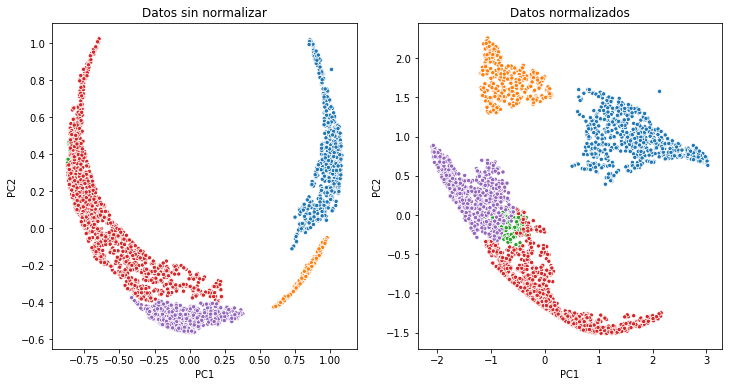

In [69]:
pca = PCA(n_components=2, random_state=number_state, svd_solver="full") #
z_pca = pca.fit_transform(X_sphere)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.scatterplot(ax=axs[0], x=z_pca[:,0], y=z_pca[:,1], legend=False, size=0.7, 
                hue=y, palette="tab10")

axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")
axs[0].set_title("Datos sin normalizar")


pca = PCA(n_components=2, random_state=number_state) #
z_pca = pca.fit_transform(X_std)

sns.scatterplot(ax=axs[1], x=z_pca[:,0], y=z_pca[:,1], legend=False, size=0.7, 
                hue=y, palette="tab10")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")
axs[1].set_title("Datos normalizados")

plt.show()

## Kernel PCA

Kernel is  rbf


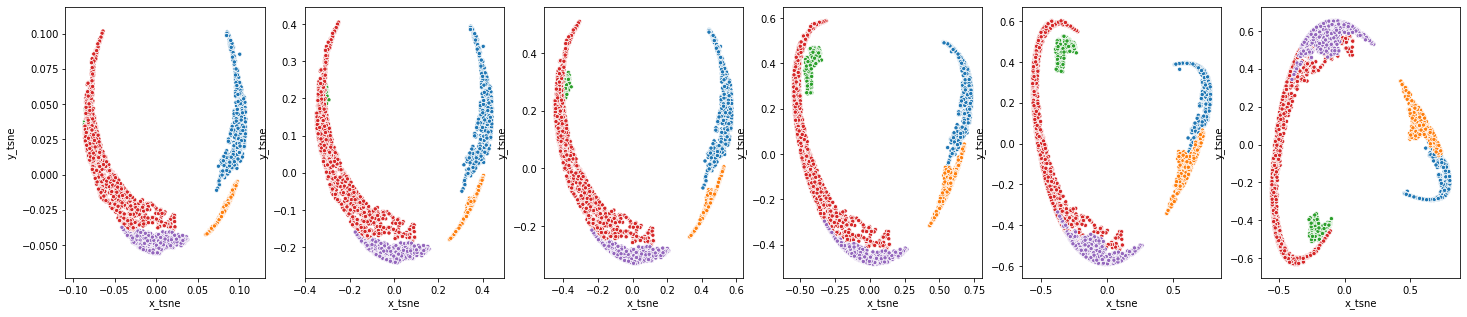

Kernel is  sigmoid


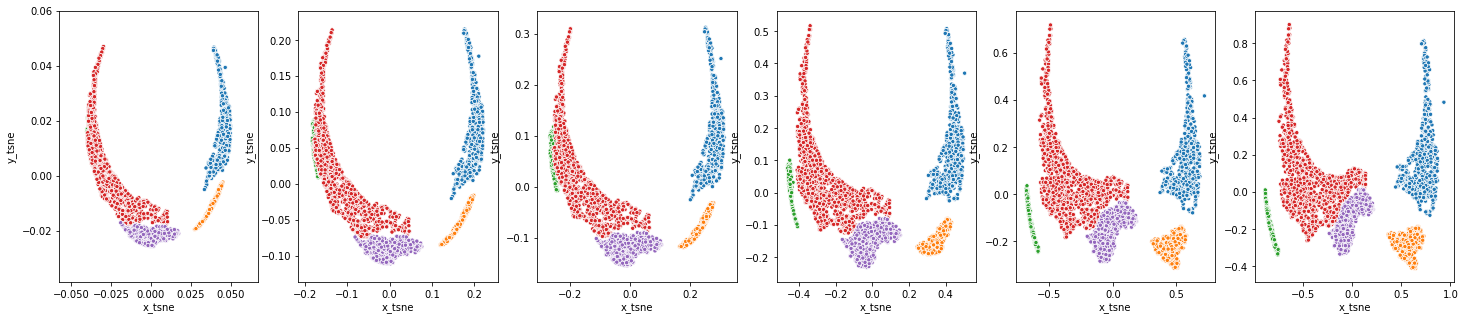

Kernel is  poly


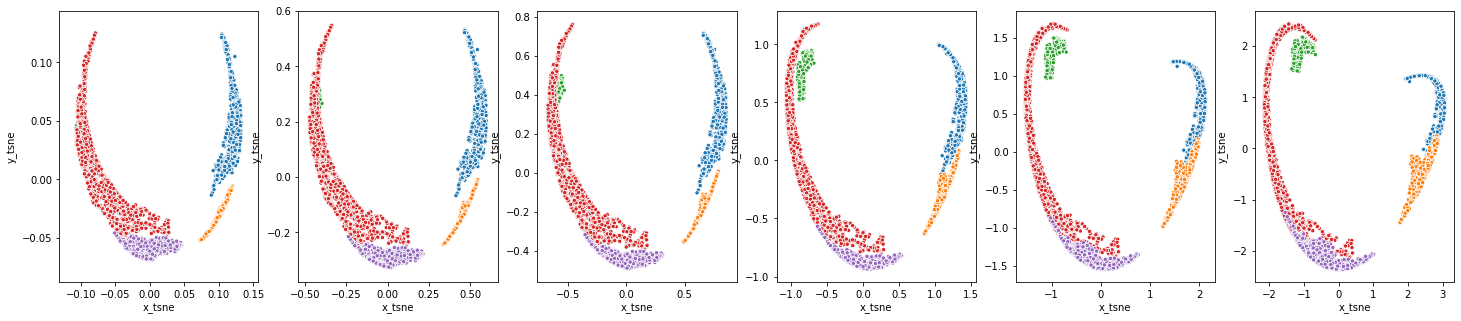

Kernel is  linear


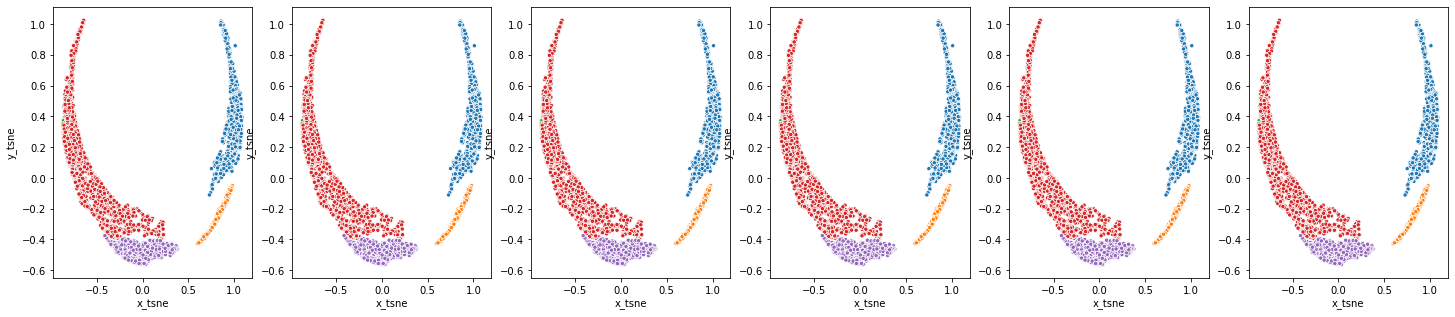

Kernel is  cosine


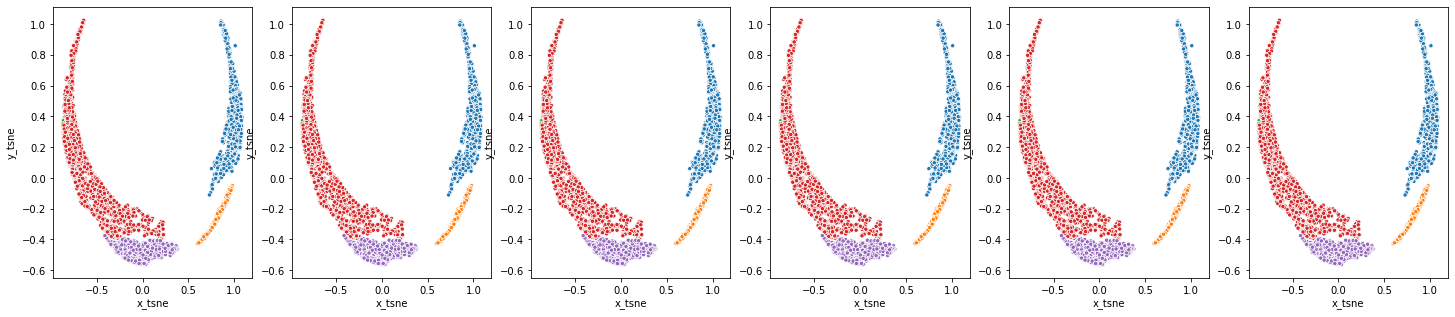

In [18]:
kernel = ['rbf', "sigmoid", "poly", "linear", "cosine"]
gamma = [0.005, 0.1, 0.2, 0.5, 0.9, 1.4]
eigen_solver = ["auto", "dense", "arpack"]

for j in kernel:
    fig, axs = plt.subplots(ncols=6, figsize=(25,5))
    for i in [0, 1, 2, 3, 4, 5]:
      kpca = KernelPCA(n_components=2, kernel=j, gamma=gamma[i], random_state=number_state, 
                       eigen_solver=eigen_solver[0])

      z_tsne = kpca.fit_transform(X_sphere)
      z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

      sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
    print("Kernel is ", str(j))
    plt.show()

Kernel is  rbf


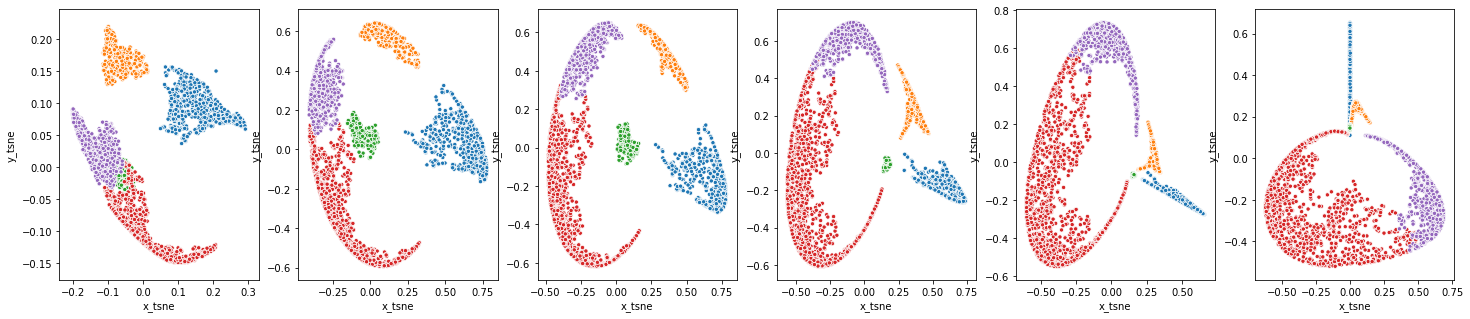

Kernel is  sigmoid


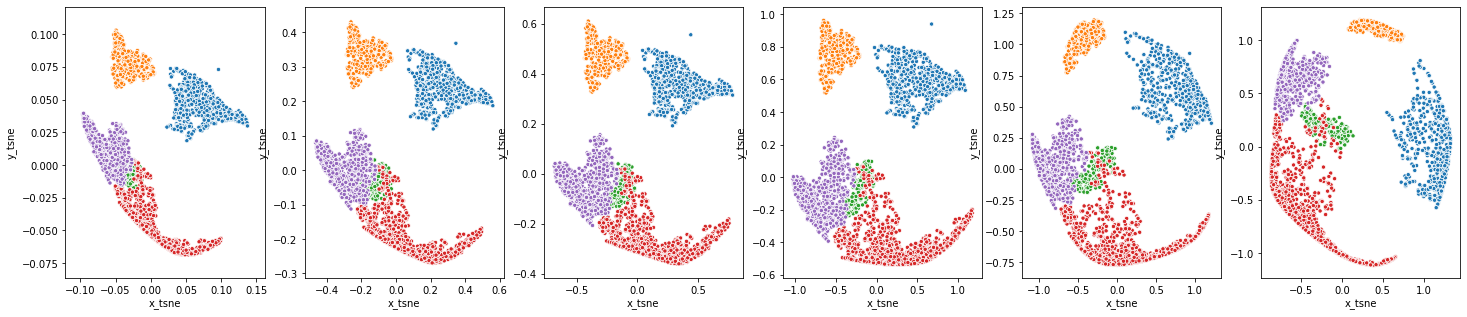

Kernel is  poly


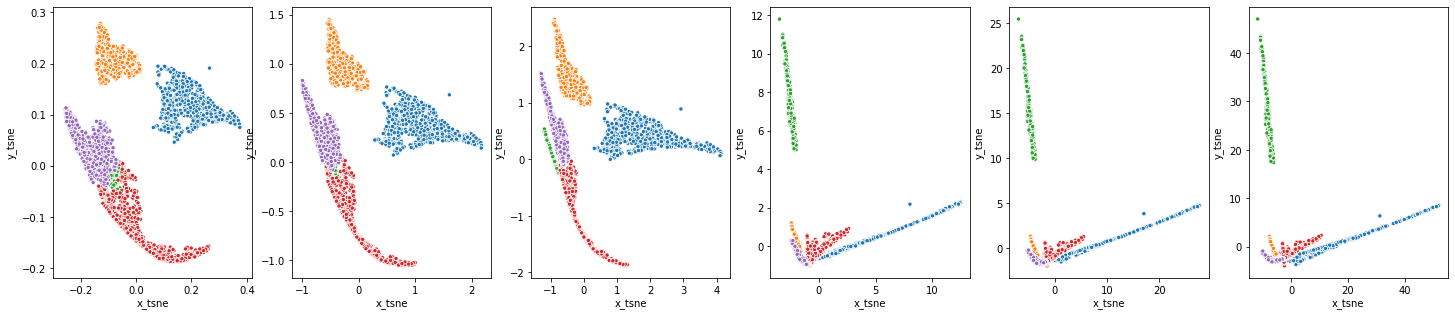

Kernel is  linear


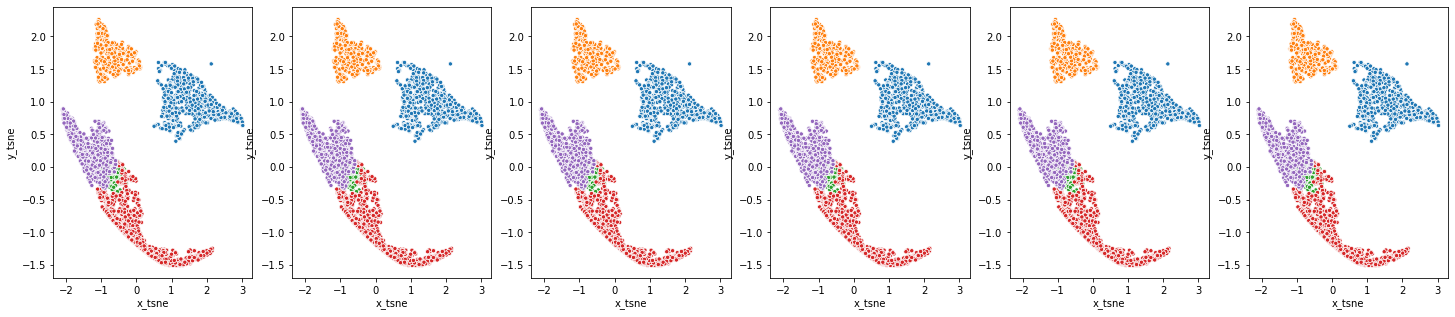

Kernel is  cosine


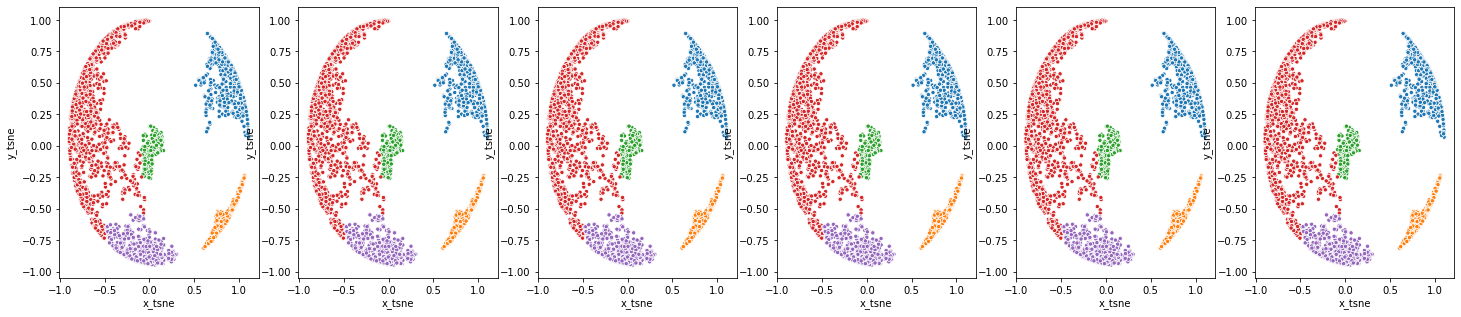

In [19]:
kernel = ['rbf', "sigmoid", "poly", "linear", "cosine"]
gamma = [0.005, 0.1, 0.2, 0.5, 0.9, 1.4]
eigen_solver = ["auto", "dense", "arpack"]

for j in kernel:
    fig, axs = plt.subplots(ncols=6, figsize=(25,5))
    for i in [0, 1, 2, 3, 4, 5]:
      kpca = KernelPCA(n_components=2, kernel=j, gamma=gamma[i], random_state=number_state, 
                       eigen_solver=eigen_solver[0])

      z_tsne = kpca.fit_transform(X_std)
      z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

      sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
    print("Kernel is ", str(j))
    plt.show()

#### Gráfica gamma

Kernel is  rbf


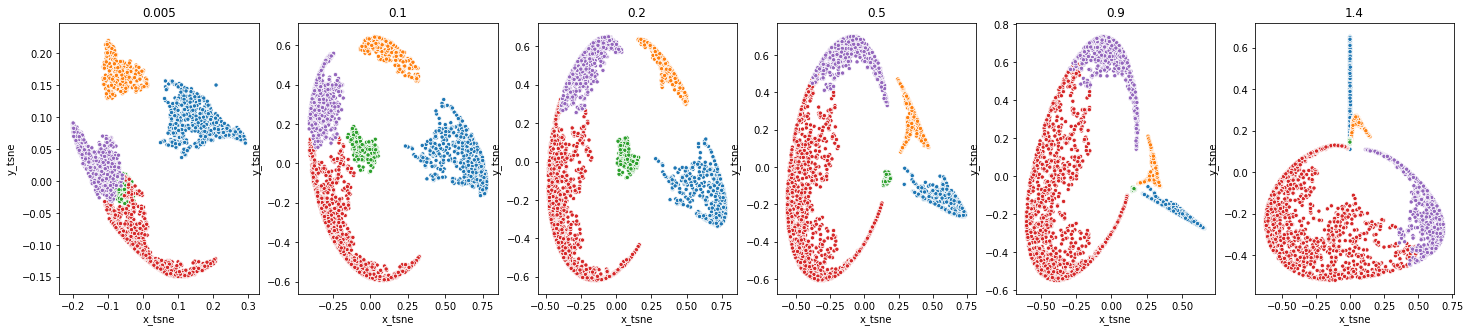

In [77]:
kernel = ['rbf']
gamma = [0.005, 0.1, 0.2, 0.5, 0.9, 1.4]
eigen_solver = ["auto", "dense", "arpack"]

for j in kernel:
    fig, axs = plt.subplots(ncols=6, figsize=(25,5))
    for i in [0, 1, 2, 3, 4, 5]:
      kpca = KernelPCA(n_components=2, kernel=j, gamma=gamma[i], random_state=number_state, 
                       eigen_solver=eigen_solver[0])

      z_tsne = kpca.fit_transform(X_std)
      z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

      sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
      axs[i].set_title(str(gamma[i]))
    print("Kernel is ", str(j))
    plt.show()

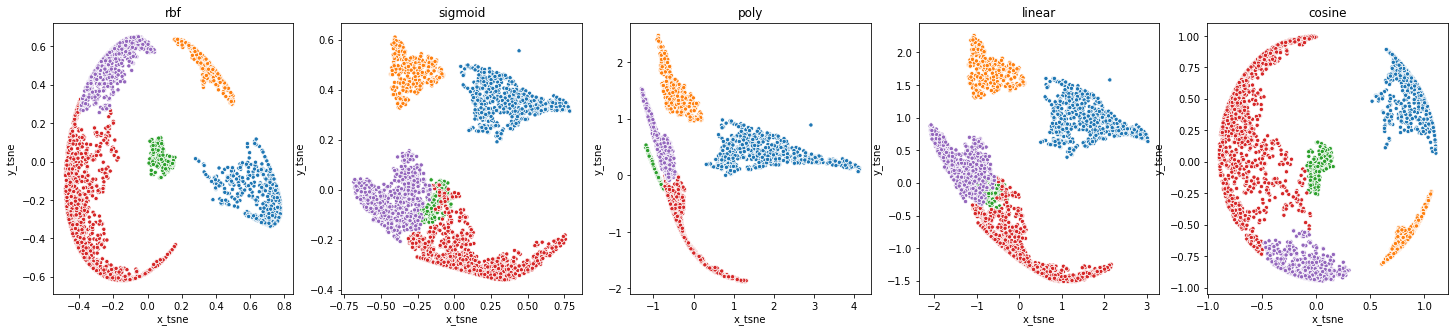

In [75]:
kernel = ['rbf', "sigmoid", "poly", "linear", "cosine"]
gamma = [0.2]
eigen_solver = ["auto", "dense", "arpack"]

fig, axs = plt.subplots(ncols=5, figsize=(25,5))
for i in [0, 1, 2, 3, 4]:
    kpca = KernelPCA(n_components=2, kernel=kernel[i], gamma=gamma[0], random_state=number_state, 
                       eigen_solver=eigen_solver[0])

    z_tsne = kpca.fit_transform(X_std)
    z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

    sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
    axs[i].set_title(kernel[i])
plt.show()

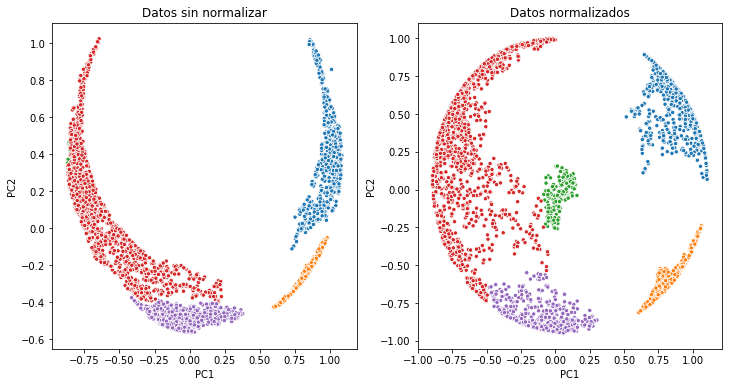

In [76]:
kpca = KernelPCA(n_components=2, kernel=kernel[i], gamma=gamma[0], random_state=number_state, 
                       eigen_solver=eigen_solver[0])
z_pca = kpca.fit_transform(X_sphere)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.scatterplot(ax=axs[0], x=z_pca[:,0], y=z_pca[:,1], legend=False, size=0.7, 
                hue=y, palette="tab10")

axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")
axs[0].set_title("Datos sin normalizar")


kpca = KernelPCA(n_components=2, kernel=kernel[i], gamma=gamma[0], random_state=number_state, 
                       eigen_solver=eigen_solver[0])
z_pca = kpca.fit_transform(X_std)

sns.scatterplot(ax=axs[1], x=z_pca[:,0], y=z_pca[:,1], legend=False, size=0.7, 
                hue=y, palette="tab10")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")
axs[1].set_title("Datos normalizados")

plt.show()

## Spectral Embeddings

Kernel is  rbf


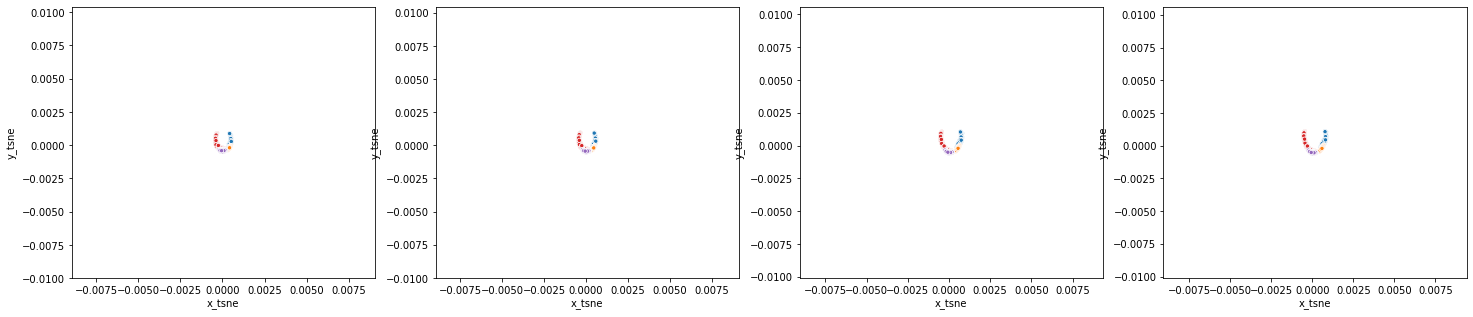

In [39]:
knn = [4, 10, 15, 30] 
gamma = [0.005, 0.1, 0.4, 0.5]
affinity = ["rbf"] 
eigen_solver = ["lobpcg", "arpack"]

for aff in affinity:
    fig, axs = plt.subplots(ncols=4, figsize=(25,5))
    for i in [0, 1, 2, 3]:
        embedding = SpectralEmbedding(n_components=2, affinity=aff, gamma=gamma[i], eigen_solver=eigen_solver[1], 
                                    n_neighbors=10)

        z_tsne = embedding.fit_transform(X_sphere)
        z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

        sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
    print("Kernel is ", aff)
    plt.show()

Kernel is  rbf


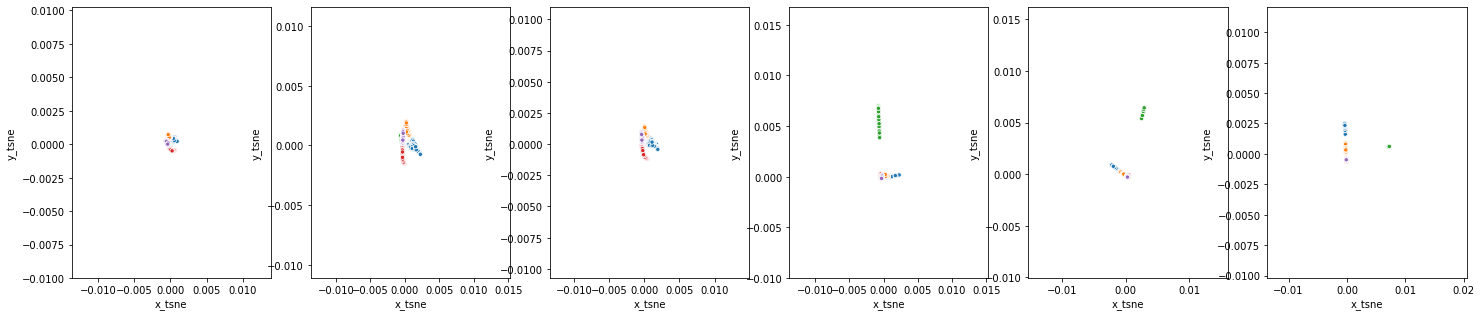

In [35]:
knn = [4, 10, 15, 30] 
gamma = [0.005, 0.4, 0.2, 0.5, 0.9, 1.4]
affinity = ["rbf"] 
eigen_solver = ["lobpcg", "arpack"]

for aff in affinity:
    fig, axs = plt.subplots(ncols=6, figsize=(25,5))
    for i in [0, 1, 2, 3, 4, 5]:
      embedding = SpectralEmbedding(n_components=2, affinity=aff, gamma=gamma[i], eigen_solver=eigen_solver[1], 
                                    n_neighbors=10)

      z_tsne = embedding.fit_transform(X_std)
      z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

      sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
    print("Kernel is ", aff)
    plt.show()

## t-SNE

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.151s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.015396
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.065765
[t-SNE] KL divergence after 1000 iterations: 0.724736
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.023634
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.605537
[t-SNE] KL divergence after 1000 iterations: 0.638467


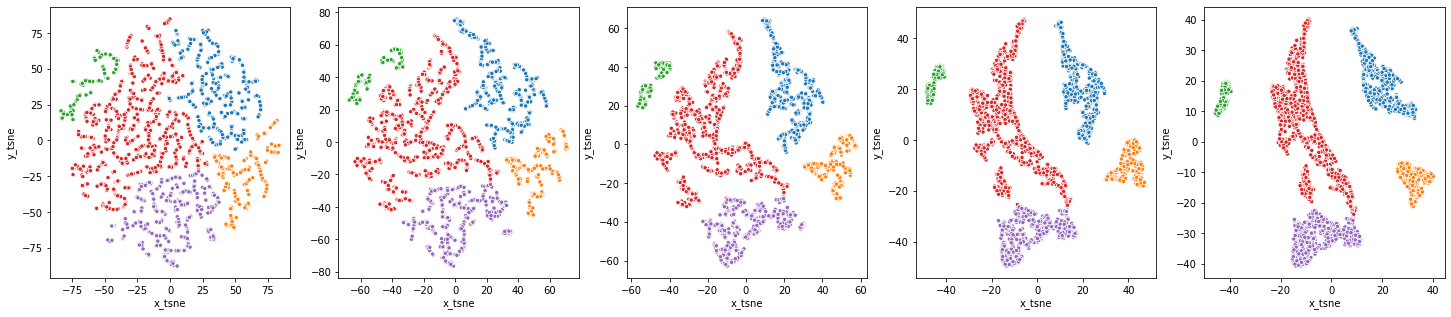

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.004s...
[t-SNE] Computed neighbors for 2906 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.015396
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.783913
[t-SNE] KL divergence after 1000 iterations: 0.596103
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.023634
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.369942
[t-SNE] KL divergence after 1000 iterations: 0.548385


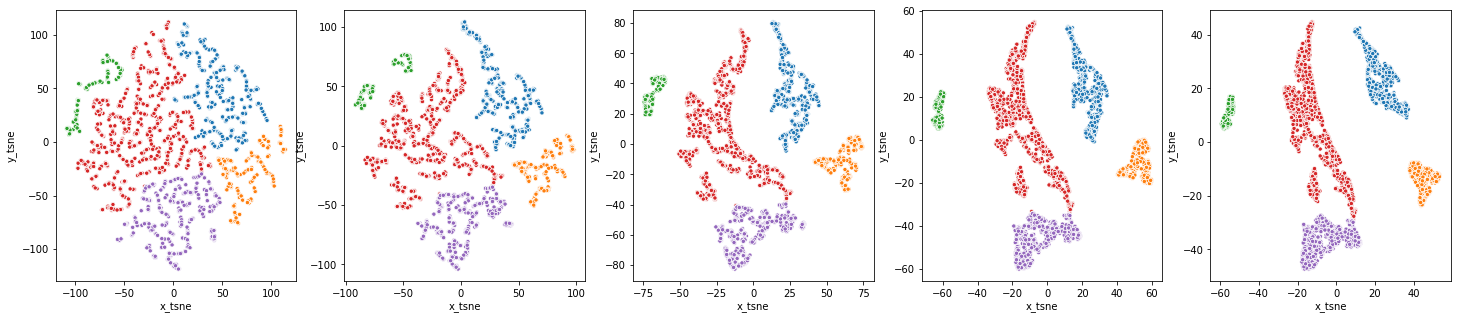

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.108s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.015396
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.881355
[t-SNE] KL divergence after 1000 iterations: 0.587431
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.023634
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.450203
[t-SNE] KL divergence after 1000 iterations: 0.538277


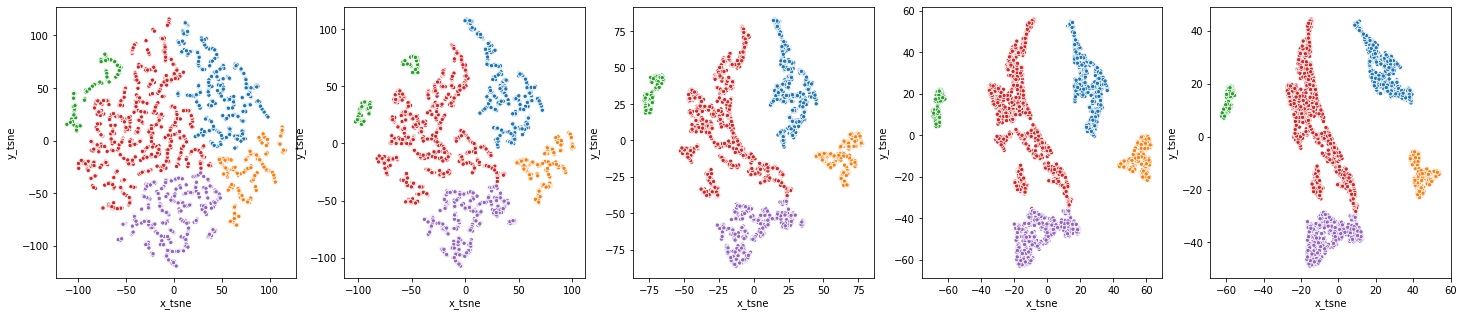

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.005s...
[t-SNE] Computed neighbors for 2906 samples in 0.115s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.015396
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.082596
[t-SNE] KL divergence after 1000 iterations: 0.580581
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.023634
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.561169
[t-SNE] KL divergence after 1000 iterations: 0.529803


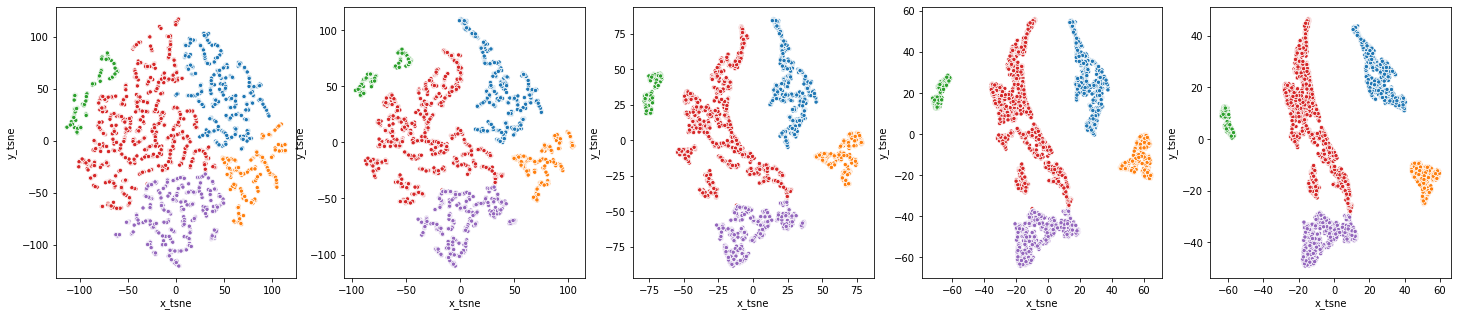

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.108s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.015396
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.351898
[t-SNE] KL divergence after 1000 iterations: 0.581732
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.023634
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.815445
[t-SNE] KL divergence after 1000 iterations: 0.525330


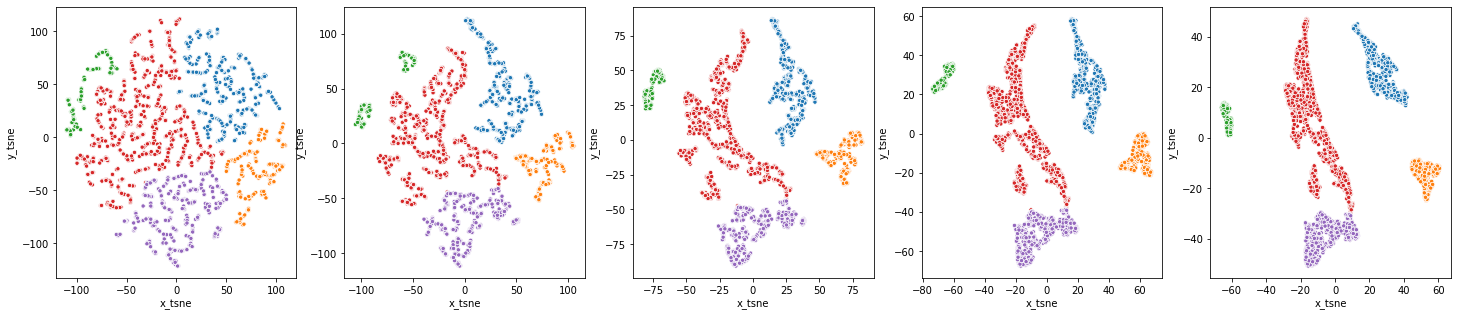

Verbose is  0 , learning rate  20.0 .


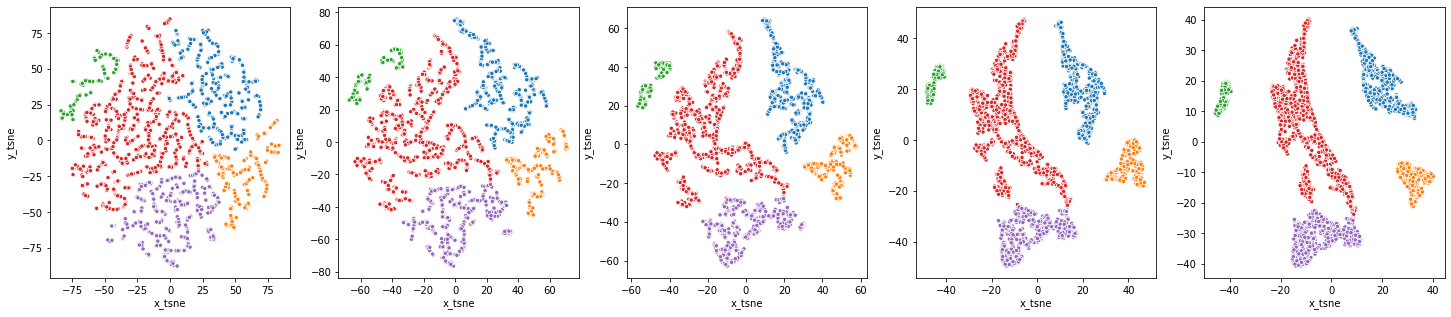

Verbose is  0 , learning rate  90.0 .


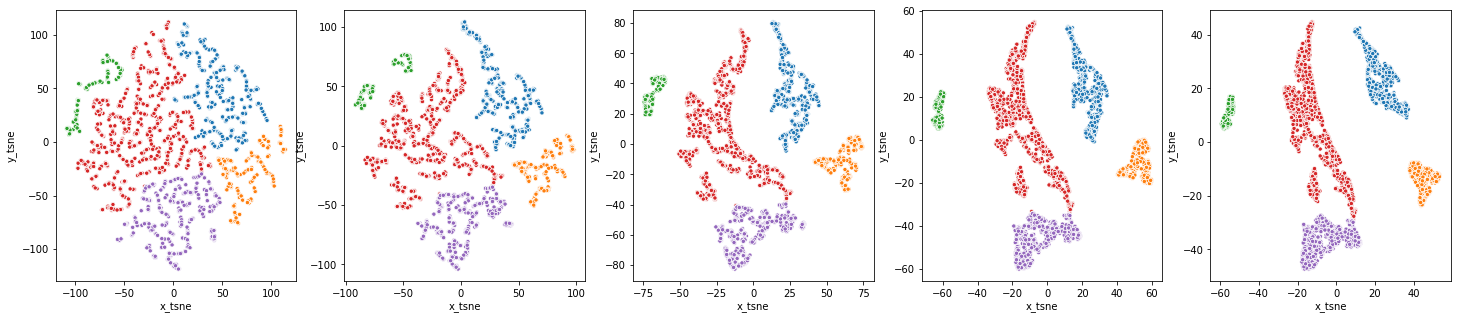

Verbose is  0 , learning rate  150.0 .


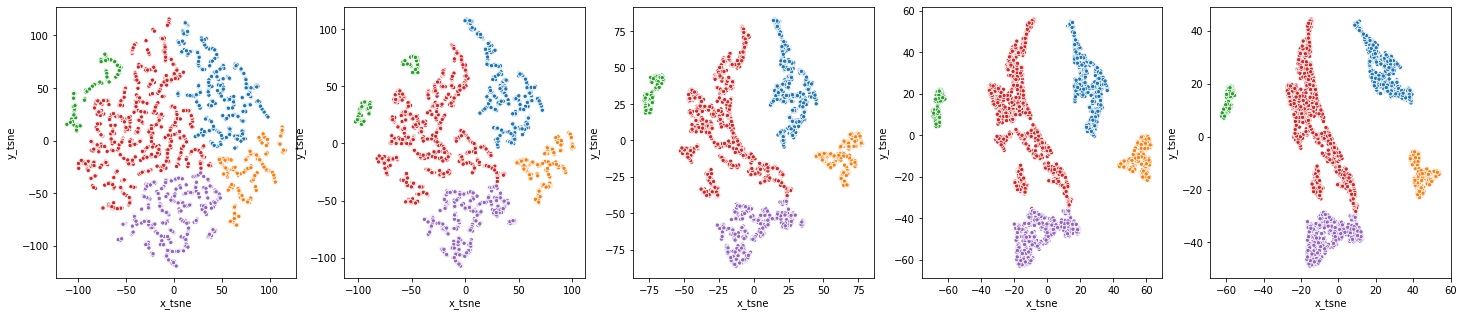

Verbose is  0 , learning rate  200.0 .


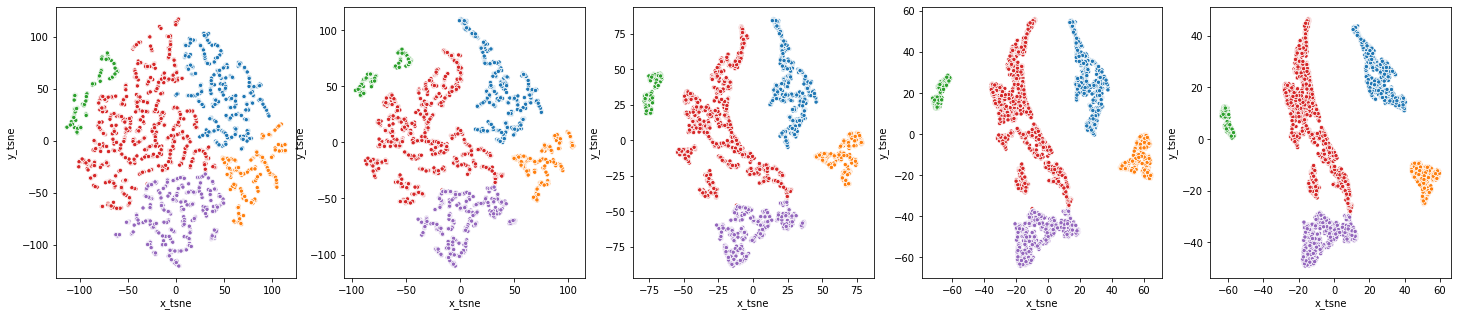

Verbose is  0 , learning rate  300.0 .


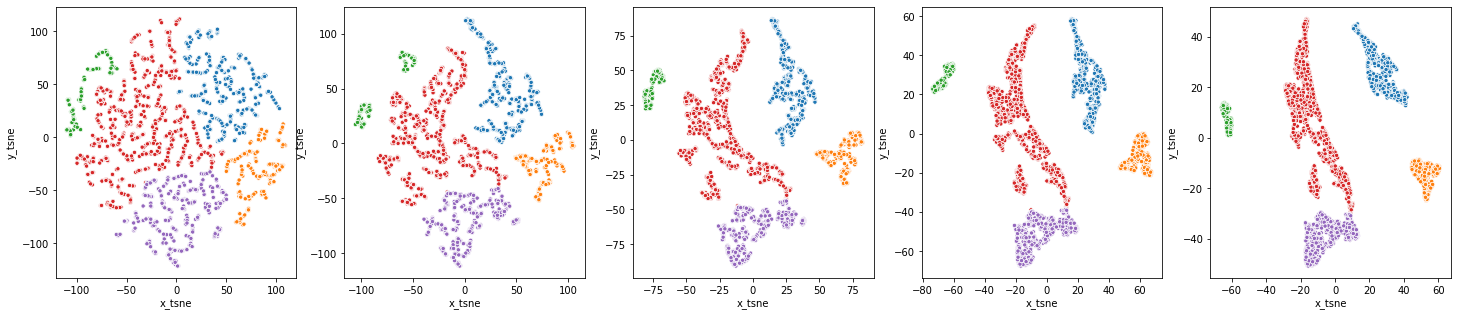

In [21]:
perplexity = [5, 10, 20, 40, 60]
learning_rate = [20., 90., 150., 200.0, 300.]
verbose = [1]
for j in verbose:
  for k in learning_rate:
    fig, axs = plt.subplots(ncols=5, figsize=(25,5))
    for i in [0, 1, 2, 3, 4]:
      tsne = TSNE(n_components=2, perplexity=perplexity[i], verbose=j, random_state=number_stateer_state, learning_rate=k, 
                  init="pca", n_jobs=-1)
      z_tsne = tsne.fit_transform(X_sphere)
      z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

      sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
    print("Verbose is ", str(j), ", learning rate ", str(k), ".")
    plt.show()

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.041691
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.846970
[t-SNE] KL divergence after 1000 iterations: 0.729985
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.114s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.063646
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.595188
[t-SNE] KL divergence after 1000 iterations: 0.643000


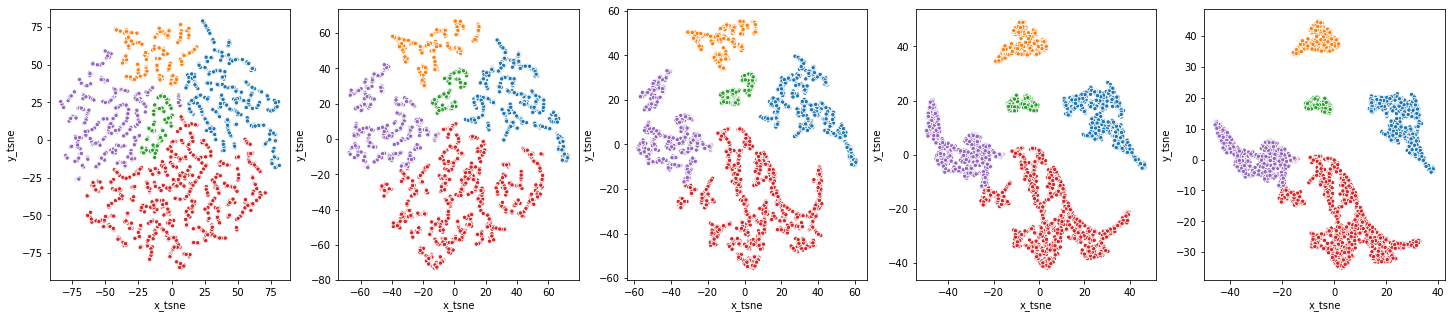

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.005s...
[t-SNE] Computed neighbors for 2906 samples in 0.115s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.041691
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.595520
[t-SNE] KL divergence after 1000 iterations: 0.601879
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.112s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.063646
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.380661
[t-SNE] KL divergence after 1000 iterations: 0.557675


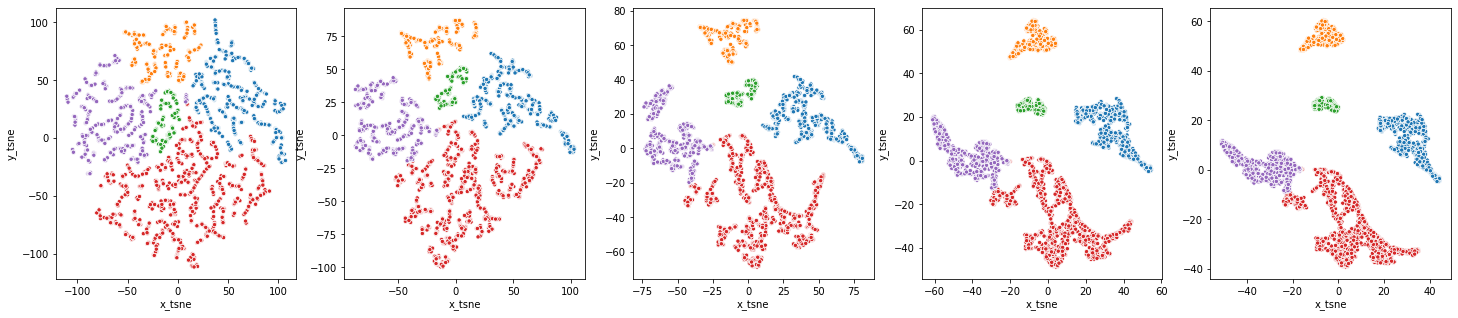

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.005s...
[t-SNE] Computed neighbors for 2906 samples in 0.124s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.041691
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.712341
[t-SNE] KL divergence after 1000 iterations: 0.593257
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.063646
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.467010
[t-SNE] KL divergence after 1000 iterations: 0.543109


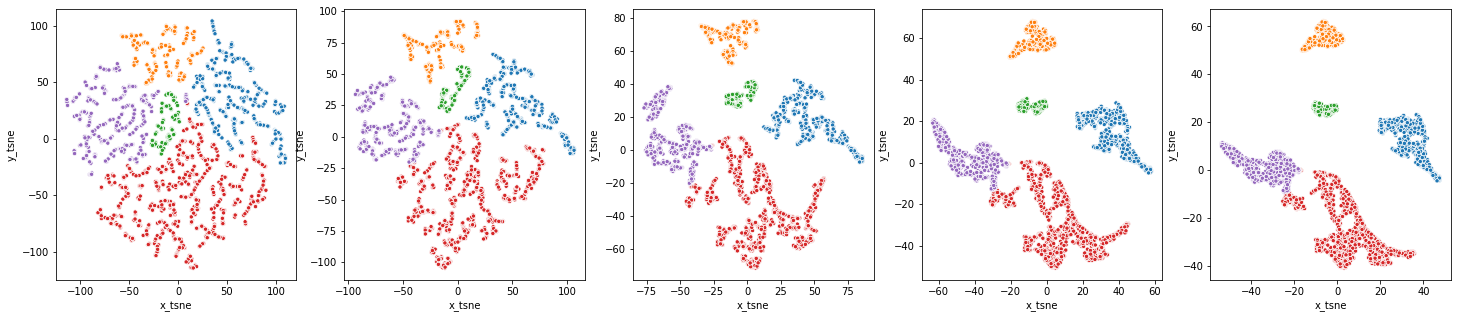

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.041691
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.898949
[t-SNE] KL divergence after 1000 iterations: 0.589563
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.063646
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.597866
[t-SNE] KL divergence after 1000 iterations: 0.537617


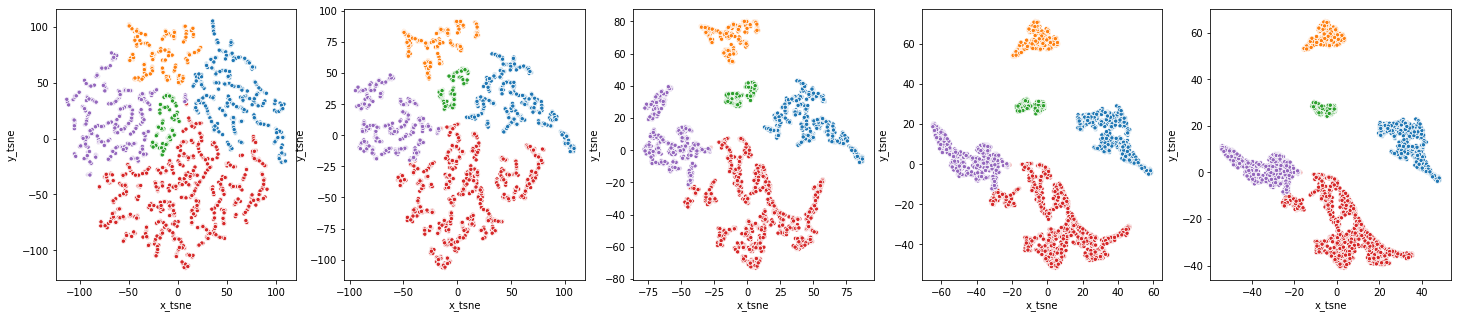

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.108s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.041691
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.264702
[t-SNE] KL divergence after 1000 iterations: 0.586361
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.063646
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.854355
[t-SNE] KL divergence after 1000 iterations: 0.529902


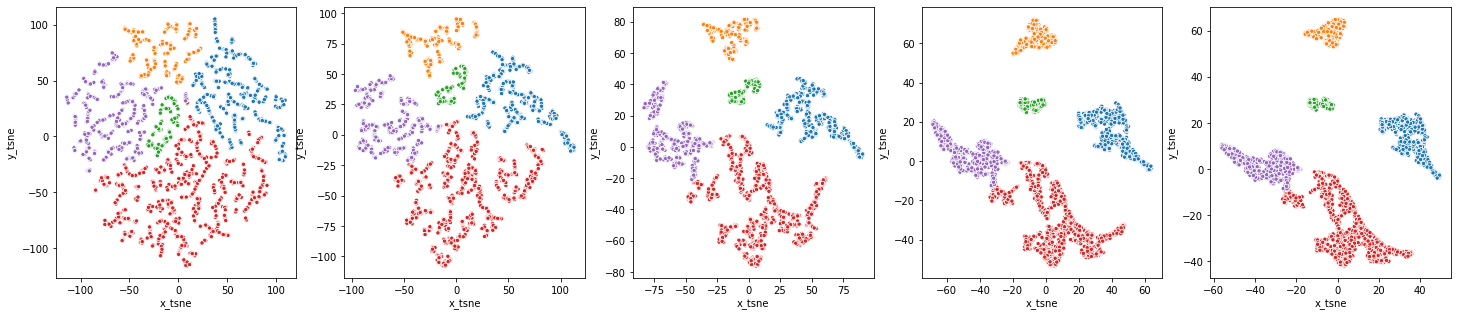

In [23]:
perplexity = [5, 10, 20, 40, 60]
learning_rate = [20., 90., 150., 200.0, 300.]
verbose = [1]
for j in verbose:
  for k in learning_rate:
    fig, axs = plt.subplots(ncols=5, figsize=(25,5))
    for i in [0, 1, 2, 3, 4]:
      tsne = TSNE(n_components=2, perplexity=perplexity[i], verbose=j, random_state=number_state, learning_rate=k, 
                  init="pca", n_jobs=-1)
      z_tsne = tsne.fit_transform(X_std)
      z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

      sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
    print("Verbose is ", str(j), ", learning rate ", str(k), ".")
    plt.show()

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.108s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.041691
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.898949
[t-SNE] KL divergence after 1000 iterations: 0.589563
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.004s...
[t-SNE] Computed neighbors for 2906 samples in 0.111s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.063646
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.597866
[t-SNE] KL divergence after 1000 iterations: 0.537617


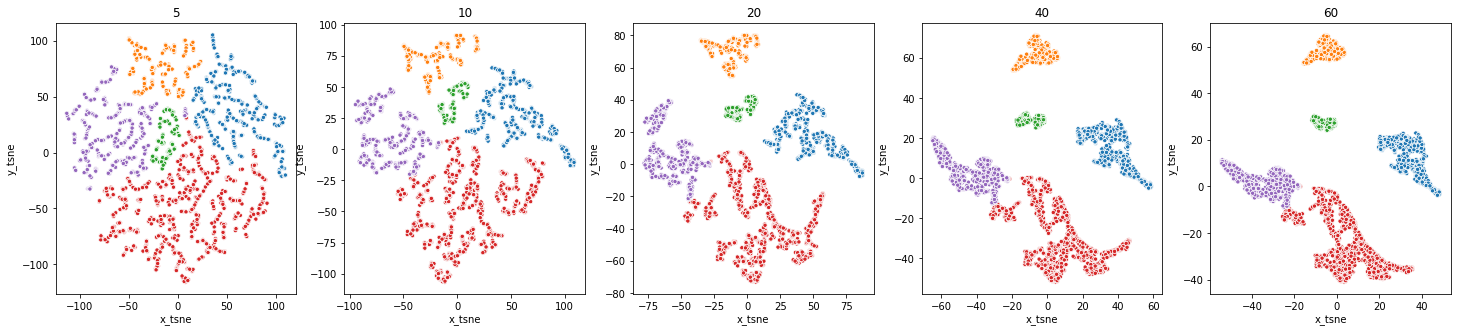

In [84]:
perplexity = [5, 10, 20, 40, 60]
verbose = [1]
for j in verbose:
    fig, axs = plt.subplots(ncols=5, figsize=(25,5))
    for i in [0, 1, 2, 3, 4]:
        tsne = TSNE(n_components=2, perplexity=perplexity[i], verbose=j, random_state=19970808, 
              init="pca", n_jobs=-1)
        z_tsne = tsne.fit_transform(X_std)
        z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

        sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
        axs[i].set_title(str(perplexity[i]))
    print("Verbose is ", str(j))
    plt.show()

--------------------Finished PCA-----------------
-------------------Finished KPCA-----------------
-------------------Finished Spectral Embedding-----------------
-------------------Finished T-SNE-----------------
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.003s...
[t-SNE] Computed neighbors for 2906 samples in 0.122s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.139087
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.300911
[t-SNE] KL divergence after 1000 iterations: 0.418615


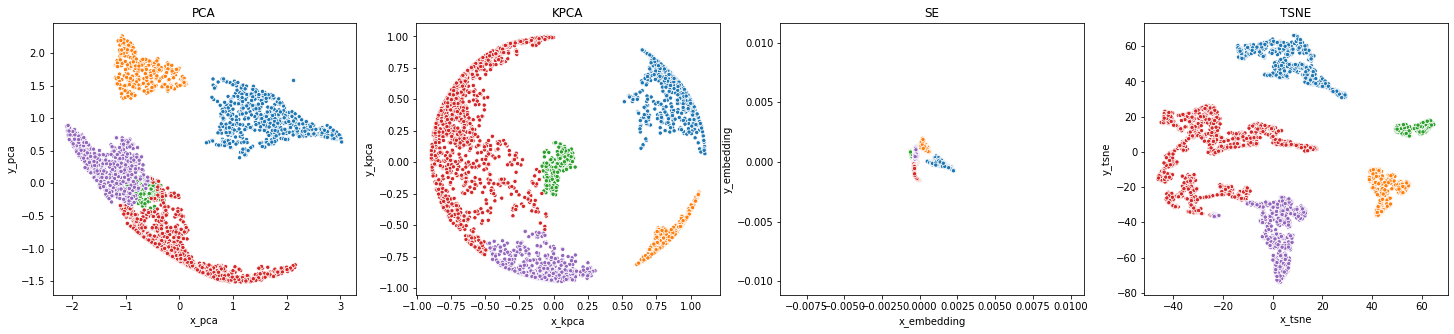

In [83]:
kpca_gamma = 0.2
e_n_neighbors = 10 
e_gamma = 0.4
e_affinity = "rbf"
e_eigen='arpack'
t_perplexity = 40 
n_components = 2
t_verbose = 1
random_state = 19970808 
kpca_kernel = 'cosine' 
first_model = reduction_manifold(X_std, y, kpca_kernel, kpca_gamma, e_affinity, e_gamma, e_eigen, e_n_neighbors, t_perplexity)